In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Users\Kenneth\Miniconda3\envs\clearbrain_lastresort\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


# Data 9

In [5]:
# Read in 
df9 = pd.read_csv('../data/df9.csv')

In [6]:
# Inspect
df9.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,-1.912877,-0.509738,1.935923,-2.119992,0.474137,3.647543,A2,B2,C133,D3,-23.858957
1,-0.341252,0.341502,2.268666,-0.948835,-0.492523,4.159113,A1,B4,C130,D2,-5.204424
2,0.658157,-0.347933,3.104409,0.236928,0.359240,6.498557,A1,B4,C18,D2,11.359090
3,2.288540,-1.028834,3.554489,-0.215137,-0.436760,7.154874,A2,B1,C45,D3,-29.550723
4,0.618358,-1.526877,3.857197,-0.343902,0.098206,7.857794,A2,B2,C49,D3,-13.033020


In [8]:
df9.tail()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
995,-0.377935,-0.810448,3.658649,0.614948,-1.292935,7.227878,A1,B1,C52,D3,9.729703
996,0.968435,1.273159,3.449217,-0.073787,1.088958,6.701653,A1,B4,C168,D2,10.337900
997,0.919181,-1.518937,3.427333,1.152154,0.039267,6.797440,A2,B1,C91,D3,-13.781643
998,0.248702,-0.184816,2.923806,1.188720,-0.361918,6.040283,A2,B5,C47,D2,-10.494192
999,0.937344,-1.455486,4.277617,-0.350077,1.197847,8.533164,A1,B1,C151,D3,-8.665508


### First, summarize each variable

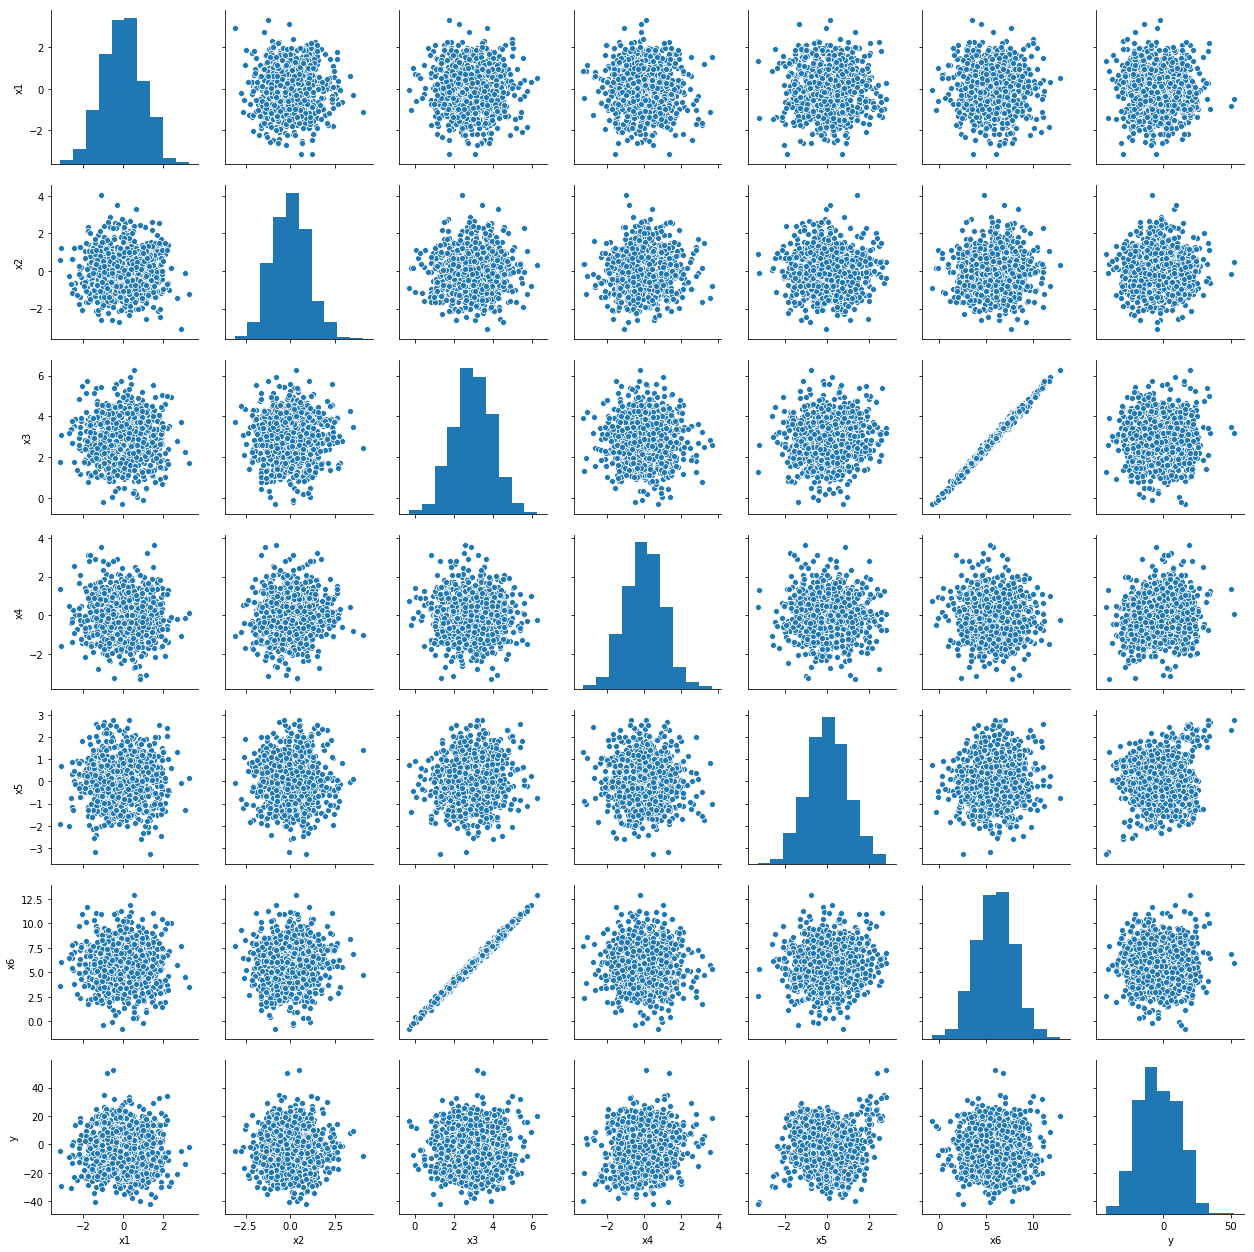

In [17]:
# Numerics
sb.pairplot(df9)

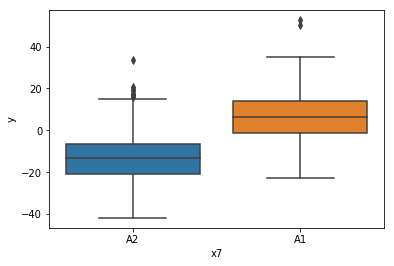

In [18]:
# x7
sb.boxplot(data=df9, x='x7', y='y')

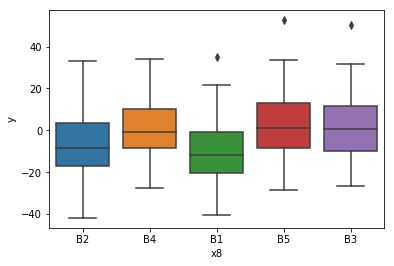

In [20]:
# x8
sb.boxplot(data=df9, x='x8', y='y')

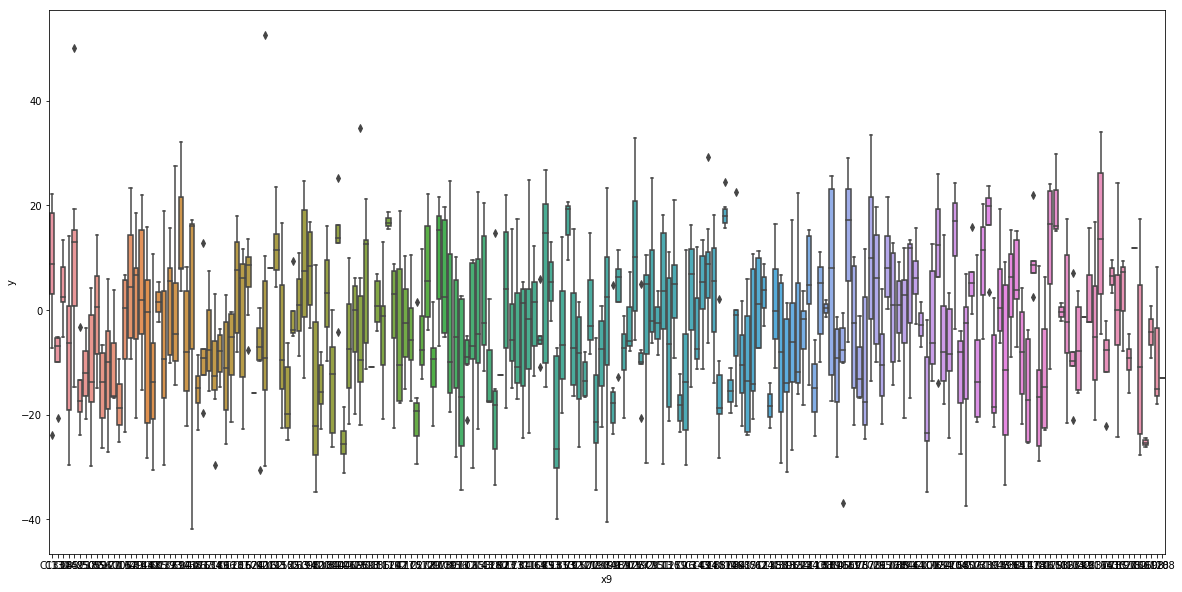

In [22]:
# x9
plt.figure(figsize=(20, 10))
sb.boxplot(data=df9, x='x9', y='y')

In [23]:
# Value counts for x9
df9['x9'].value_counts()

C171    12
C21     11
C43     10
C94     10
C49      9
        ..
C162     1
C97      1
C74      1
C99      1
C182     1
Name: x9, Length: 199, dtype: int64

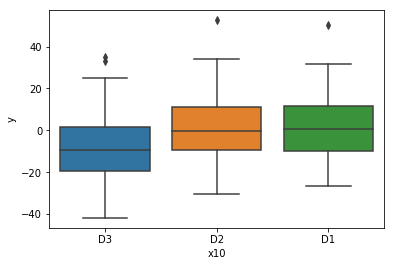

In [24]:
# x10
sb.boxplot(data=df9, x='x10', y='y')

In [25]:
# Any null
df9.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
y      0
dtype: int64

Notes:

- Some variability across all variables.
- Numerics:
    - None seem to obviously have a relationship with y
    - x3 and x6 seem highly correlated
    - x5 seems to have a different distribution than the others because it's outliers don't seem as randomly distributed as the others
- Categoricals:
    - x7/x8/x10 all seem to have some relationship with y
    - x9 has very high cardinality (i.e. a lot of values, 199, relative to the number of rows, 1k), which means we'll need to be a little careful in modelling it.  It seems at least somewhat related to y, but hard to tell with such a low sample size.
- No missing values (at least as far as we can tell so far)

### Let's fit a quick kitchen sink model to start, leaving out x9 for now

In [26]:
# Fit model
model9 = smf.ols(
    formula='y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x10',
    data=df9
)
model9_fit = model9.fit()

In [27]:
# Summarize
model9_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     90.47
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          6.36e-158
Time:                        08:37:53   Log-Likelihood:                -3707.7
No. Observations:                1000   AIC:                             7443.
Df Residuals:                     986   BIC:                             7512.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.0044      4.187     -1.912      0.056     -16.222       0.213
x7[T.A2]     -18.3927      0.630    -29.183      0.000     -19.629     -17.156
x8[T.B2]       1.6045      1.007      1.594      0.111      -0.371       3.580
x8[T.B3]      17.5711      3.982      4.413      0.000       9.758      25.385
x8[T.B4]      10.1855      2.298      4.433      0.000       5.676      14.695
x8[T.B5]      10.5223      2.272      4.630      0.000       6.063      14.982
x10[T.D2]      6.9079      3.397      2.033      0.042       0.241      13.574
x10[T.D3]      7.3054      4.056      1.801      0.072      -0.654      15.265
x1            -0.7174      0.313     -2.291      0.022      -1.332      -0.103
x2             0.2764      0.310      0.891      0.373      -0.332       0.885
x3             2.8068      3.131      0.896      0.370      -3.338       8.951
x4             2.0491      0.305      6.714      0.000       1.450       2.648
x5             0.5259      0.325      1.619      0.106      -0.112       1.163
x6            -1.3770      1.553     -0.887      0.375      -4.424       1.670
==============================================================================
Omnibus:                       39.949   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.308
Skew:                           0.419   Prob(JB):                     1.96e-11
Kurtosis:                       3.693   Cond. No.                         174.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes:

- Most categorical values seem to have strong effects, especially x7 and x8
- Most numericals, however, don't seem to.  However, keep in mind these are just simple lines we're fitting so far.

Let's look at some plots to assess to the model

In [37]:
def plot_univariate(df, x, y, model_fit, n_bins=5):
    # Add prediction
    df = df.assign(p = model_fit.predict(df))
    
    # If x is numeric, bin into 5 groups
    if df[x].dtype in (np.int64, np.float64):
        df[x] = pd.cut(df[x], n_bins).apply(str)
    
    # Aggregate
    df_agg = (
        df
        .groupby(x)
        .agg(
            n=(y, 'count'),
            y_mean=(y, 'mean'),
            p_mean=('p', 'mean'),
        )
        .reset_index()
    )
    
    print(df_agg)
    
    # Plot
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20, 10))
    
    # First plot: Counts
    ax1.bar(x, 'n', data=df_agg)
    
    # Second plot: Average actuals and predicted
    ax2.scatter(x, 'y_mean', data=df_agg, label='Actual', marker='.', color='green', linewidth=3)
    ax2.scatter(x, 'p_mean', data=df_agg, label='Predicted', marker='.', color='red', linewidth=3)
    
    plt.legend()
    plt.show()

                 x1    n    y_mean    p_mean
0  (-3.156, -1.867]   32 -7.714511 -4.212820
1  (-1.867, -0.584]  268 -1.601000 -2.087843
2   (-0.584, 0.699]  472 -3.561293 -3.709397
3    (0.699, 1.982]  213 -3.598290 -2.966536
4    (1.982, 3.265]   15 -4.379912 -7.462484


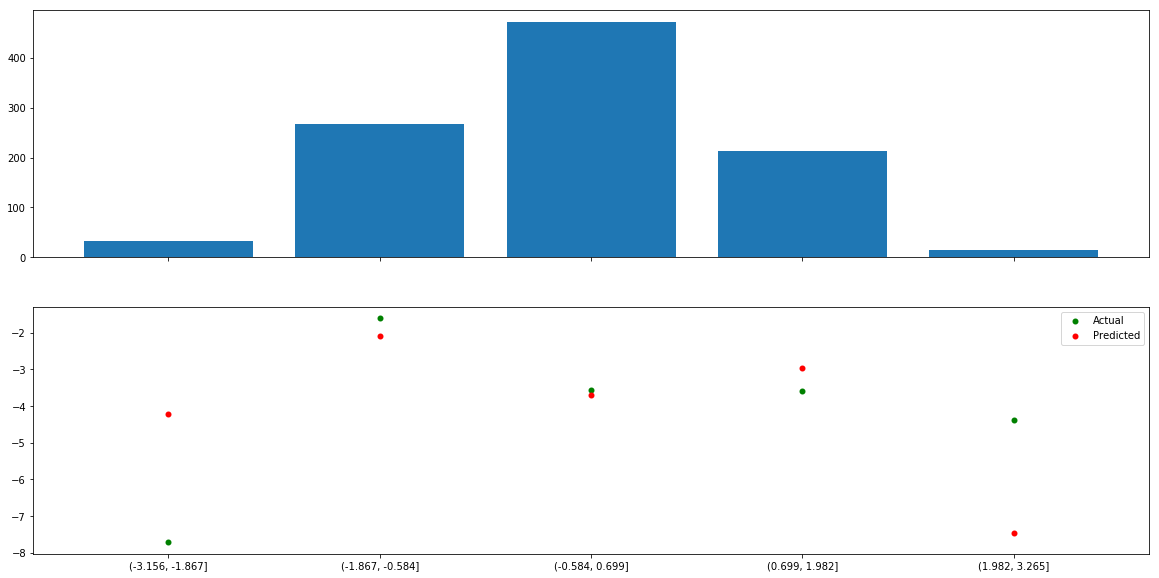

In [39]:
# x1
plot_univariate(df9, 'x1', 'y', model9_fit, n_bins=5)

Not doing well on the edges, but could be due to low sample sizes.

                 x2    n    y_mean    p_mean
0  (-3.114, -1.681]   39 -7.131200 -5.056299
1  (-1.681, -0.254]  370 -3.719661 -3.824770
2   (-0.254, 1.172]  478 -2.575604 -2.949191
3    (1.172, 2.599]  105 -2.692065 -1.728326
4    (2.599, 4.026]    8 -2.599972  1.818897


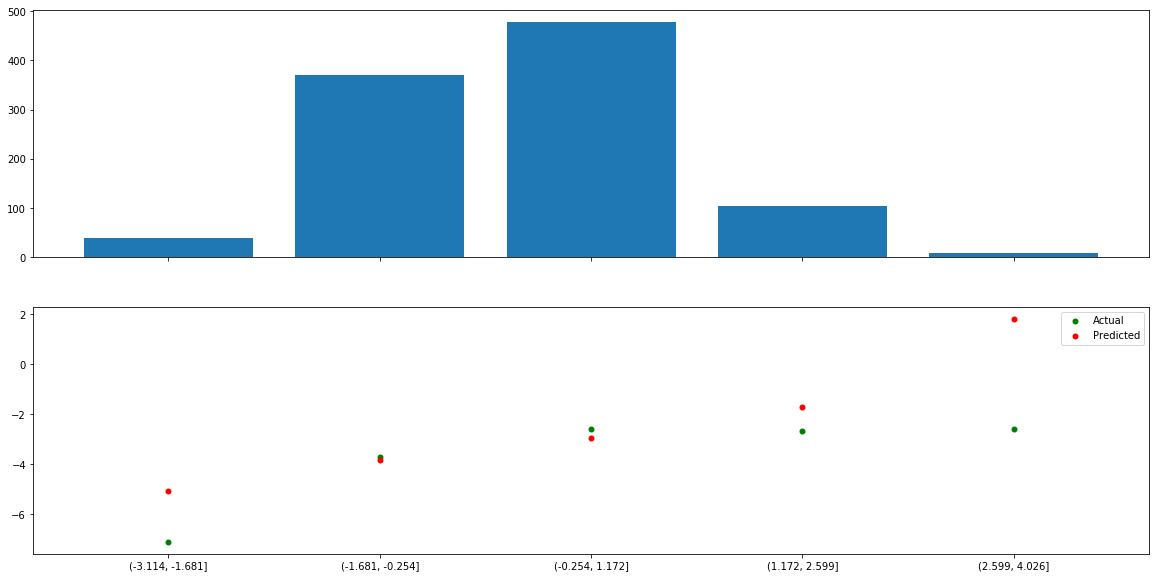

In [41]:
# x2
plot_univariate(df9, 'x2', 'y', model9_fit, n_bins=5)

Also not doing well on the edges, but could be due to low sample sizes.

               x3    n    y_mean    p_mean
0  (-0.298, 1.02]   25 -4.738267 -5.086483
1   (1.02, 2.331]  231 -2.408384 -3.136359
2  (2.331, 3.642]  486 -3.725891 -3.381583
3  (3.642, 4.953]  235 -2.979013 -2.691869
4  (4.953, 6.265]   23 -0.145752 -2.665106


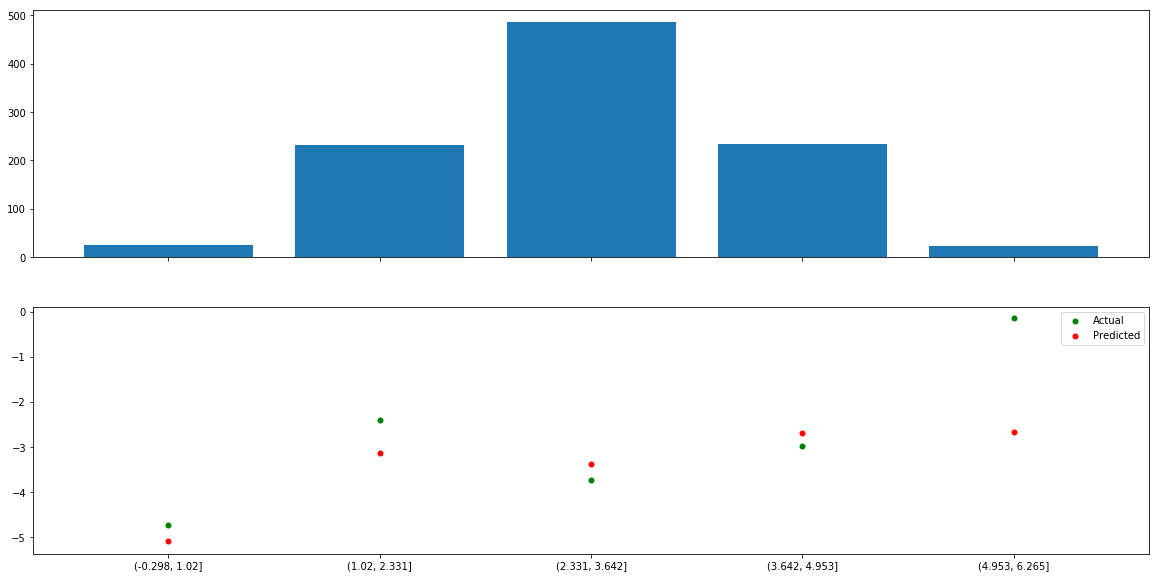

In [42]:
# x3
plot_univariate(df9, 'x3', 'y', model9_fit, n_bins=5)

                 x4    n    y_mean    p_mean
0  (-3.294, -1.904]   30 -6.856164 -7.566013
1  (-1.904, -0.521]  277 -5.570875 -5.285878
2   (-0.521, 0.861]  494 -3.079709 -3.200836
3    (0.861, 2.244]  182 -0.071303  0.090112
4    (2.244, 3.627]   17  5.539651  3.940257


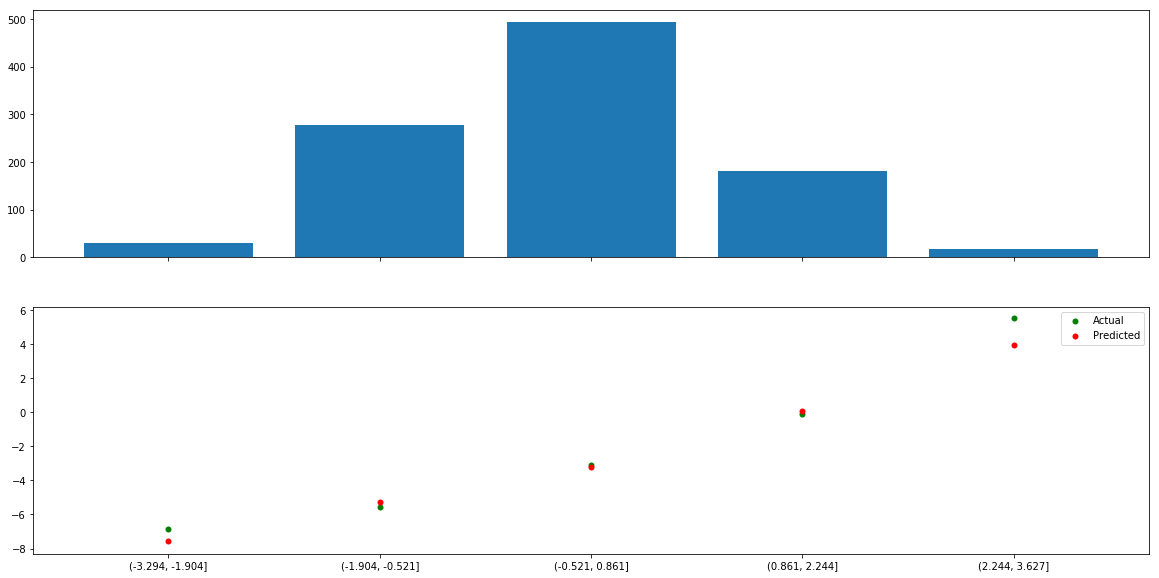

In [43]:
# x4
plot_univariate(df9, 'x4', 'y', model9_fit, n_bins=5)

                 x5    n     y_mean    p_mean
0  (-3.291, -2.071]   11 -18.449389 -7.494820
1  (-2.071, -0.857]  163   0.638131 -3.815911
2   (-0.857, 0.356]  456  -3.345422 -3.067187
3     (0.356, 1.57]  307  -7.012989 -3.015890
4     (1.57, 2.783]   63   9.340178 -2.540397


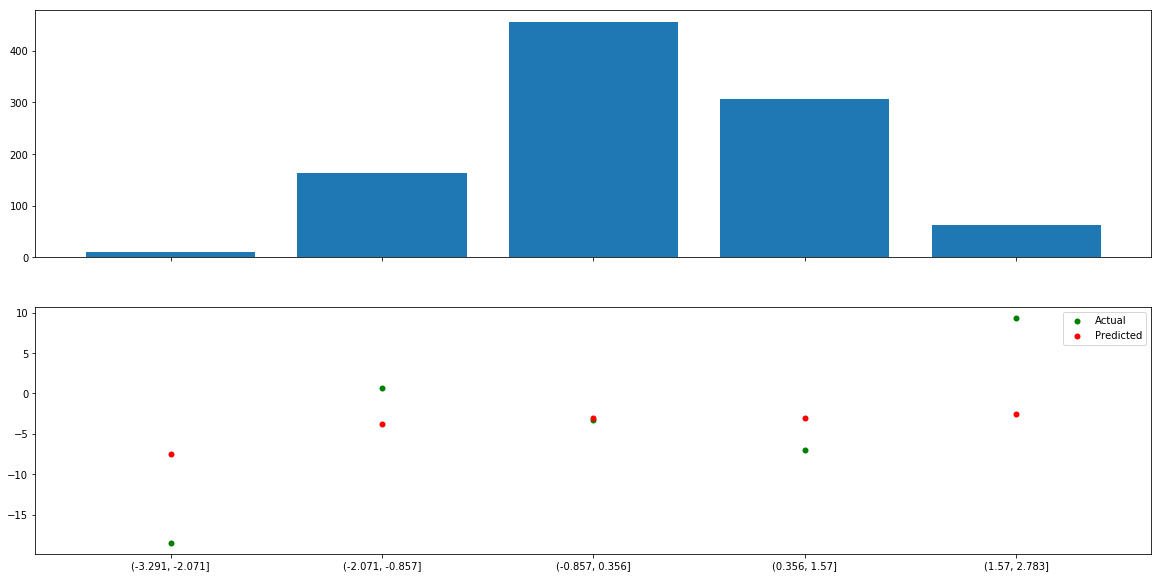

In [47]:
# x5
plot_univariate(df9, 'x5', 'y', model9_fit, n_bins=5)

                 x6    n    y_mean    p_mean
0   (-0.779, 1.968]   24 -3.403954 -4.105959
1    (1.968, 4.701]  250 -2.398761 -3.058936
2    (4.701, 7.434]  494 -3.613328 -3.180823
3   (7.434, 10.168]  213 -3.466913 -3.261831
4  (10.168, 12.901]   19  0.832892 -3.138065


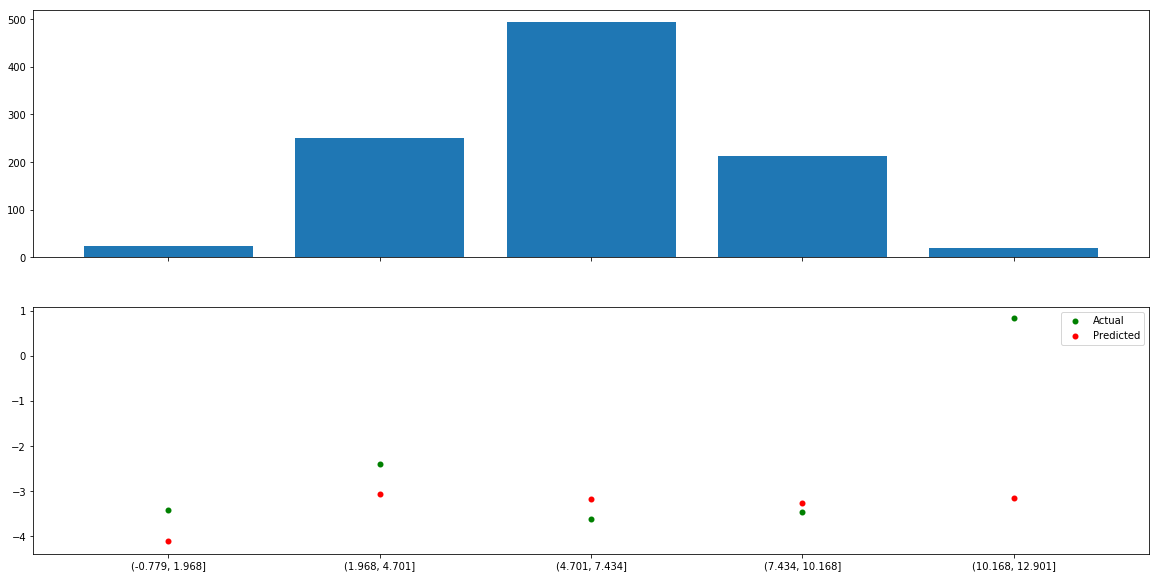

In [49]:
# x6
plot_univariate(df9, 'x6', 'y', model9_fit, n_bins=5)

   x7    n     y_mean     p_mean
0  A1  508   6.059931   6.059931
1  A2  492 -12.738702 -12.738702


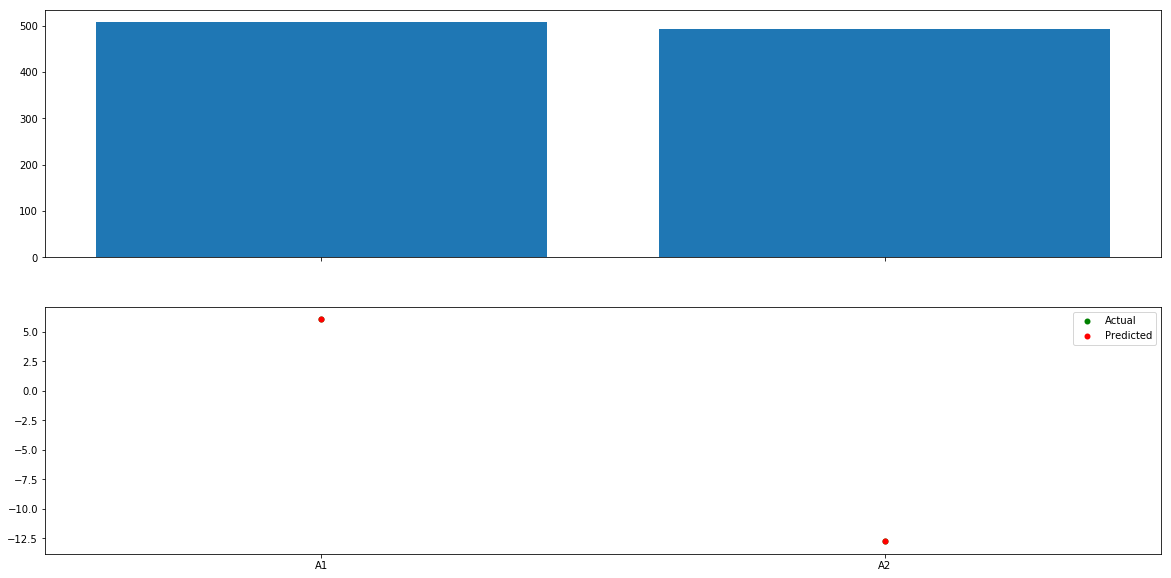

In [50]:
# x7
plot_univariate(df9, 'x7', 'y', model9_fit, n_bins=5)

   x8    n     y_mean     p_mean
0  B1  231 -10.432414 -10.432414
1  B2  170  -7.619846  -7.619846
2  B3  218   0.886464   0.886464
3  B4  170   0.043804   0.043804
4  B5  211   1.495588   1.495588


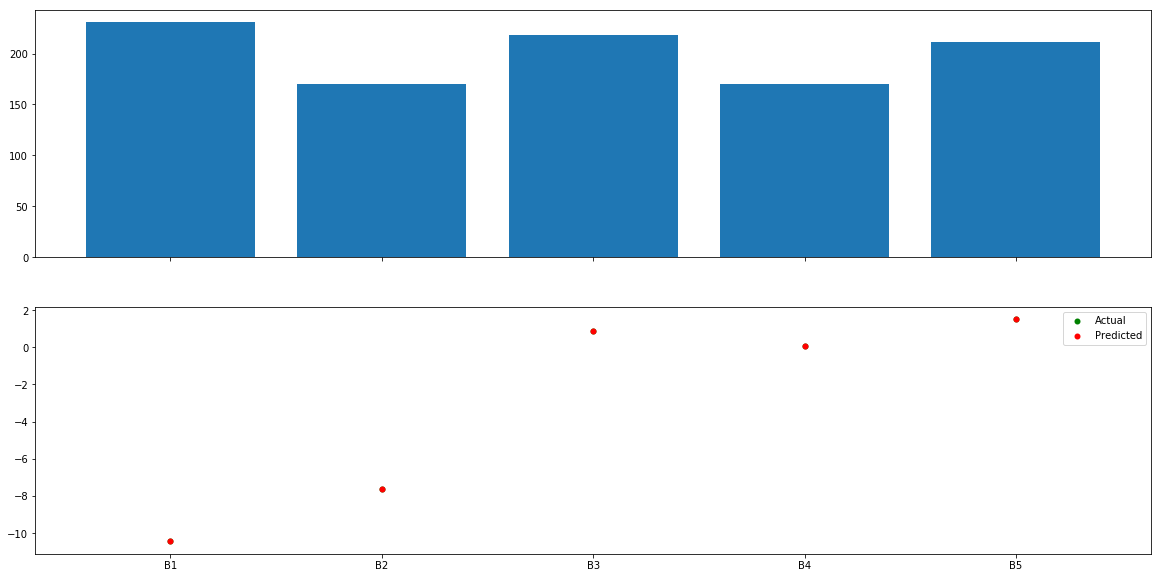

In [51]:
# x8
plot_univariate(df9, 'x8', 'y', model9_fit, n_bins=5)

  x10    n    y_mean    p_mean
0  D1  209  0.542400  0.542400
1  D2  412  0.335178  0.335178
2  D3  379 -9.077709 -9.077709


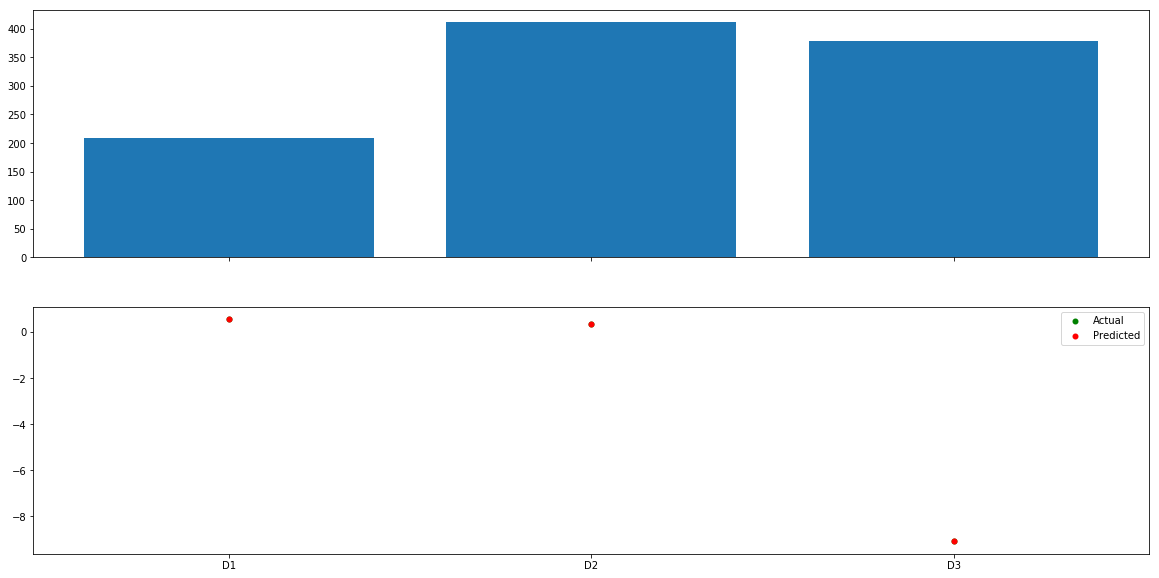

In [54]:
# x10
plot_univariate(df9, 'x10', 'y', model9_fit, n_bins=5)

Notes:

- Numerics
    - x4 is the only one with a seemlingly linear effect
    - Most others vary more in the far left/right values, with:
        - x1 bounces between over and underpredicting (maybe cubic?)
        - x2 overpredicting towards the ends (maybe parabolic?)
        - x3 same as x1
        - x5 same as x1
        - x6 underpredicting on left, overpredicting on right, and underpredicting a lot on far right (maybe cubic?)
- Categoricals
    - Estimated effects seem good
    

### Now, try some stuff to improve the model fit

From here we have a few options to try to include:

- Test some non-linear effects
- See if any of these variables have a notable interaction effect with each other
    - Start with the categorical variables interacting with the numerics, the effects are relatively large and might inform underlying distribution differences
- Try to incorporate x9
    - Eh, not quite yet, let's try some of these other ideas
    
Let's start with some non-linear effects

In [74]:
# Fit model
model9_nonlinear = smf.ols(
    formula='''y ~ x1 + np.power(x1, 2) + np.power(x1, 3) +
               x2 + np.power(x2, 2) +
               x3 + np.power(x3, 2) + np.power(x3, 3) +
               x4 +
               x5 + np.power(x5, 2) + np.power(x5, 3) +
               x6 + np.power(x6, 2) + np.power(x6, 3) + 
               x7 + x8 + x10''',
    data=df9
)
model9_nonlinear_fit = model9_nonlinear.fit()

In [75]:
# Summarize
model9_nonlinear_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     98.88
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          1.75e-230
Time:                        09:08:42   Log-Likelihood:                -3514.5
No. Observations:                1000   AIC:                             7075.
Df Residuals:                     977   BIC:                             7188.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -10.8249      4.067     -2.662      0.008     -18.806      -2.844
x7[T.A2]          -18.2737      0.523    -34.909      0.000     -19.301     -17.246
x8[T.B2]            1.4726      0.839      1.756      0.079      -0.173       3.118
x8[T.B3]           18.1908      3.308      5.499      0.000      11.699      24.683
x8[T.B4]            9.9914      1.913      5.223      0.000       6.237      13.746
x8[T.B5]           10.3265      1.893      5.454      0.000       6.611      14.042
x10[T.D2]           7.8005      2.821      2.765      0.006       2.264      13.337
x10[T.D3]           8.5210      3.373      2.527      0.012       1.903      15.139
x1                 -1.7635      0.425     -4.147      0.000      -2.598      -0.929
np.power(x1, 2)    -0.5467      0.190     -2.878      0.004      -0.919      -0.174
np.power(x1, 3)     0.4001      0.116      3.461      0.001       0.173       0.627
x2                  0.0267      0.261      0.102      0.919      -0.486       0.539
np.power(x2, 2)    -0.3406      0.173     -1.974      0.049      -0.679      -0.002
x3                 30.6365     16.053      1.908      0.057      -0.865      62.138
np.power(x3, 2)   -10.1791      5.652     -1.801      0.072     -21.271       0.913
np.power(x3, 3)     1.0894      0.635      1.715      0.087      -0.157       2.336
x4                  2.1569      0.253      8.520      0.000       1.660       2.654
x5                 -5.6783      0.441    -12.882      0.000      -6.543      -4.813
np.power(x5, 2)     1.9765      0.196     10.085      0.000       1.592       2.361
np.power(x5, 3)     2.0638      0.122     16.937      0.000       1.825       2.303
x6                -13.8082      7.813     -1.767      0.077     -29.140       1.524
np.power(x6, 2)     2.1515      1.363      1.579      0.115      -0.523       4.826
np.power(x6, 3)    -0.1094      0.076     -1.438      0.151      -0.259       0.040
==============================================================================
Omnibus:                       12.588   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.951
Skew:                           0.108   Prob(JB):                       0.0114
Kurtosis:                       2.590   Cond. No.                     2.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notes:

- Numerics
    - x4 still has significant linear effect
    - x1 and x5 have significant 2- and 3-power effects
    - We get the "strong multicollinearity" error, probably due to x3 and x6 being so strongly correlated.  Let's drop one arbitrarily in favor of the other (keep x6 because 6 is clearly a better number than 3)
- Categoricals
    - Don't really change from the previous modmel

Let's reassess the univariates.

                 x1    n    y_mean    p_mean
0  (-3.156, -1.867]   32 -7.714511 -9.852891
1  (-1.867, -0.584]  268 -1.601000 -1.114250
2   (-0.584, 0.699]  472 -3.561293 -3.447207
3    (0.699, 1.982]  213 -3.598290 -4.147082
4    (1.982, 3.265]   15 -4.379912 -4.311666


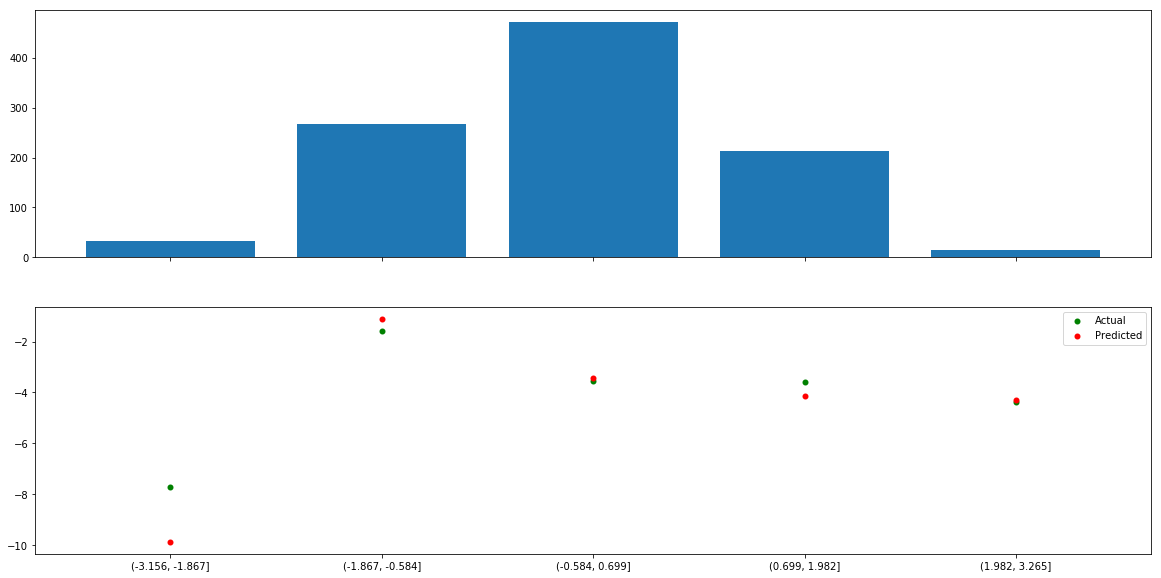

In [78]:
# x1
plot_univariate(df9, 'x1', 'y', model9_nonlinear_fit, n_bins=5)